In [1]:
%load_ext autoreload
%autoreload 2
from courtvision.data import PadelDataset, GeneralResult, KeypointValue
from courtvision.swiss import get_latest_file
from courtvision.vis import draw_points
from pathlib import Path
import json
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
DATA_PATH = Path("/Users/benjamindecharmoy/projects/courtvision/datasets/box")
annotations_file = get_latest_file(DATA_PATH, file_suffix=".json")
print(f"Loading annotations from {annotations_file}")
with open(annotations_file, mode="r") as fp:
    dataset = PadelDataset(samples=json.load(fp))

Loading annotations from /Users/benjamindecharmoy/projects/courtvision/datasets/box/project-2-at-2023-06-02-20-01-ee9545af.json


In [3]:
def get_keypoints_as_dict(results: list[GeneralResult]):
    keypoints = {}
    for result in results:
        if isinstance(result.value, KeypointValue):
            keypoints[result.value.keypointlabels[0]] = (
                result.value.x / 100.0 * result.original_width,
                result.value.y / 100.0 * result.original_height,
            )
    return keypoints


image_points = get_keypoints_as_dict(dataset.samples[0].annotations[0].result)
image_points

image_points_calib = image_points.copy()
# image_points_calib.pop("bottom_left_front")
# image_points_calib.pop("bottom_right_front")

image_points_calib_2 = image_points.copy()
image_points_calib_2.pop("top_left_back")
image_points_calib_2.pop("top_right_back")

image_points_array = np.array(list(image_points.values())).astype(np.float32)
image_points_calib_array_2 = np.array(list(image_points_calib_2.values())).astype(
    np.float32
)
image_points_calib_array = np.array(list(image_points_calib.values())).astype(
    np.float32
)
image_points_array, image_points, image_points_calib_array, image_points_calib

(array([[ 208.34645, 2078.5347 ],
        [2059.6536 , 2042.8005 ],
        [ 440.50394,  845.7075 ],
        [1756.063  ,  833.79614],
        [ 500.0315 , 2822.9956 ],
        [1756.063  , 2787.2615 ]], dtype=float32),
 {'top_left_front': (208.3464566929134, 2078.5347119645494),
  'top_right_front': (2059.6535433070867, 2042.8005908419498),
  'top_left_back': (440.503937007874, 845.7075332348599),
  'top_right_back': (1756.0629921259842, 833.7961595273265),
  'bottom_left_front': (500.0314960629921, 2822.995568685377),
  'bottom_right_front': (1756.0629921259842, 2787.261447562777)},
 array([[ 208.34645, 2078.5347 ],
        [2059.6536 , 2042.8005 ],
        [ 440.50394,  845.7075 ],
        [1756.063  ,  833.79614],
        [ 500.0315 , 2822.9956 ],
        [1756.063  , 2787.2615 ]], dtype=float32),
 {'top_left_front': (208.3464566929134, 2078.5347119645494),
  'top_right_front': (2059.6535433070867, 2042.8005908419498),
  'top_left_back': (440.503937007874, 845.7075332348599),
  't

In [4]:
box_width = 330.0  # mm
box_length = 365.0  # mm
box_height = 330.0  # mm
box_height_calib = 0.0  # mm
object_points = {
    "top_left_front": (0.0, 0.0, box_height_calib),
    "top_right_front": (box_width, 0.0, box_height_calib),
    "top_left_back": (0.0, box_length, box_height_calib),
    "top_right_back": (box_width, box_length, box_height_calib),
    "bottom_left_front": (0.0, 0.0, box_height_calib),
    "bottom_right_back": (box_width, 0.0, box_height_calib),
}

object_points_2 = {
    "bottom_left_front": (0.0, 0.0, box_height_calib),
    "bottom_right_back": (box_width, 0.0, box_height_calib),
    "top_left_front": (0, box_height, box_height_calib),
    "top_right_front": (box_width, box_height, box_height_calib),
}

object_points_pose = {
    "top_left_front": (0.0, 0.0, box_height),
    "top_right_front": (box_width, 0.0, box_height),
    "top_left_back": (0.0, box_length, box_height),
    "top_right_back": (box_width, box_length, box_height),
    "bottom_left_front": (0.0, 0.0, 0.0),
    "bottom_right_front": (box_width, 0.0, 0.0),
}
object_points_pose_array = np.array(list(object_points_pose.values())).astype(
    np.float32
)
object_points_array = np.array(list(object_points.values())).astype(np.float32)
object_points_array_2 = np.array(list(object_points_2.values())).astype(np.float32)
object_points_array, object_points

(array([[  0.,   0.,   0.],
        [330.,   0.,   0.],
        [  0., 365.,   0.],
        [330., 365.,   0.],
        [  0.,   0.,   0.],
        [330.,   0.,   0.]], dtype=float32),
 {'top_left_front': (0.0, 0.0, 0.0),
  'top_right_front': (330.0, 0.0, 0.0),
  'top_left_back': (0.0, 365.0, 0.0),
  'top_right_back': (330.0, 365.0, 0.0),
  'bottom_left_front': (0.0, 0.0, 0.0),
  'bottom_right_back': (330.0, 0.0, 0.0)})

In [5]:
object_points_all = {
    "quater": (box_width / 4, box_length / 4, box_height),
    "middle": (box_width / 2, box_length / 2, box_height),
    "base_middle": (box_width / 2, 0, 0),
    "base_middle_450": (box_width / 2, 0, 0),
    **object_points_pose,
}
object_points_all_array = np.array(list(object_points_all.values())).astype(np.float32)

(4032, 2268, 3)


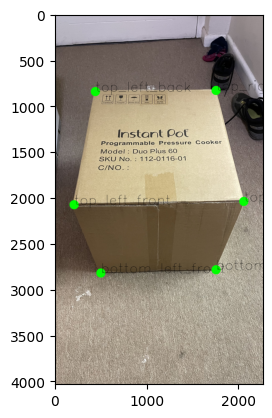

In [6]:
IMAGE_PATH = "/Users/benjamindecharmoy/projects/courtvision/IMG_4263.jpg"
image = cv2.imread(IMAGE_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(
    draw_points(
        image.copy(),
        points=image_points_array,
        labels=list(image_points.keys()),
        fontScale=5,
        radius=50,
        thickness=-1,
    )
)

print(image.shape)

In [7]:
repo_erro, camera_matrix, dist_coeffs, *_ = cv2.calibrateCamera(
    objectPoints=[object_points_array, object_points_array_2],
    imagePoints=[image_points_calib_array, image_points_calib_array_2],
    imageSize=(image.shape[1], image.shape[0]),
    cameraMatrix=None,
    distCoeffs=None,
)
print(f"Reprojection error: {repo_erro}")

Reprojection error: 253.54403733596723


Aspect ratio: 0.5625 and k11/k00=0.5649717575005544
Aspect ratio: 0.5625 and k00/k11=1.7699999809265134
[[ 275.37363 3387.8044 ]
 [2060.8933  3391.3147 ]
 [ 436.08804 1437.1295 ]
 [1729.7803  1447.8766 ]
 [1046.0857  3330.799  ]
 [1818.3724  3903.23   ]]
(4032, 2268, 3)


(array([[2.19601309e+04, 0.00000000e+00, 1.95987652e+03],
        [0.00000000e+00, 2.06810234e+04, 9.02208741e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([ 1.45436745e+01, -1.25034273e+03,  8.15522723e-02, -6.98202926e-02,
         3.36658639e+04]))

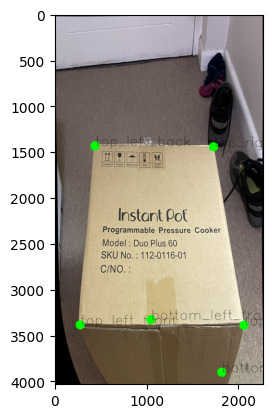

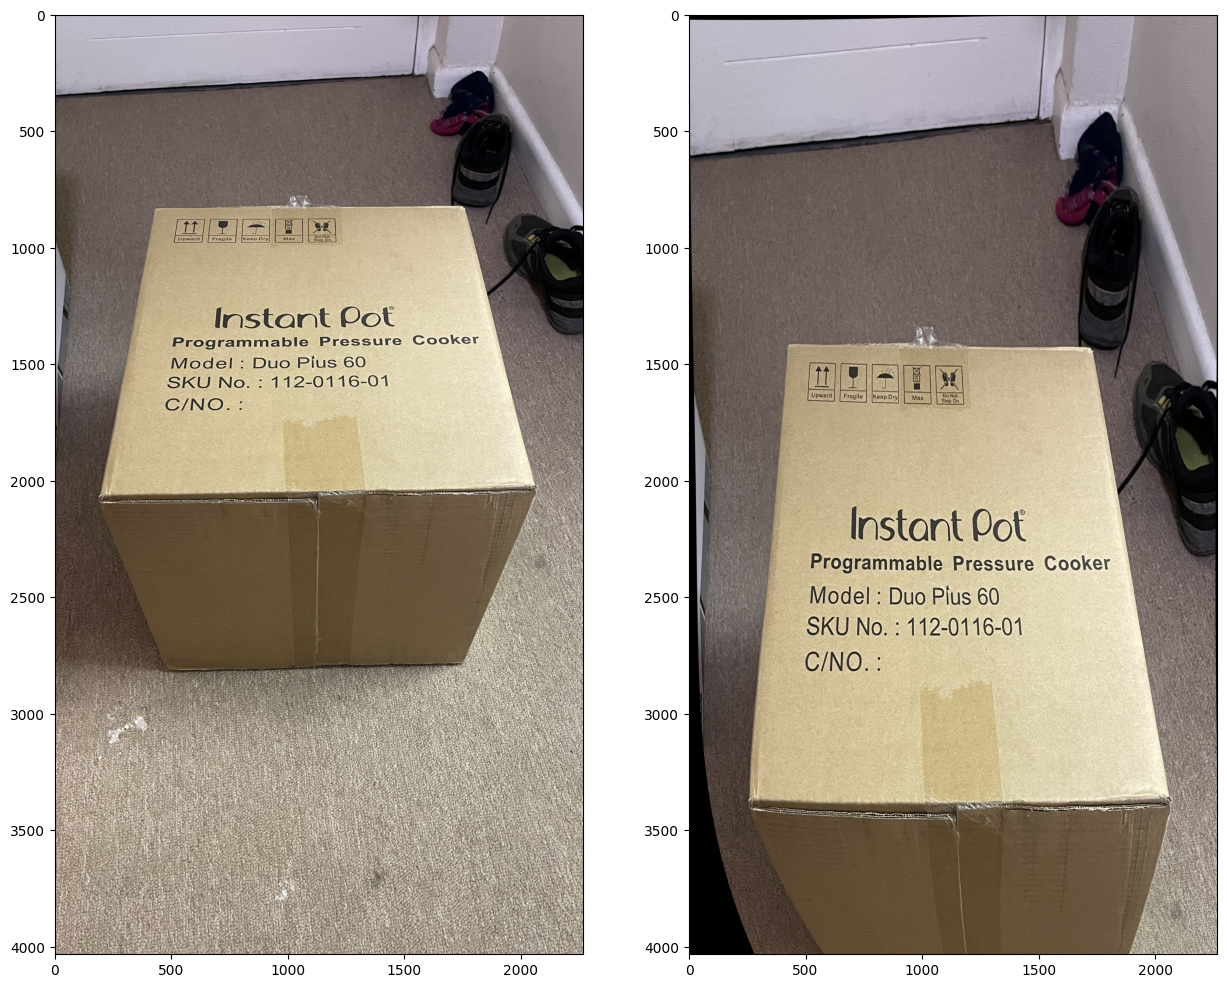

In [8]:
# undistort


# k00=float("2708.735909878217")
# k10=float("0")
# k20=float("0")
# k01=float("0")
# k11=float("2706.911971541245")
# k21=float("0")
# k02=float("1919.5" )
# k12=float("1079.5" )
# k22=float("1")
# d0=float("0.2076158238168724" )
# d1=float("-0.9322088580351203")
# d2=float("0")
# d3=float("0")
# d4=float("1.700483302161548")

k00 = float("20770.4490504776")
k10 = float("0")
k20 = float("0")
k01 = float("0")
k11 = float("11734.71710412405")
k21 = float("0")
k02 = float("1978.495742502031")
k12 = float("518.2362018865923")
k22 = float("1")
d0 = float("14.54367446063934")
d1 = float("-1250.342727252504")
d2 = float("0.08155227230811522")
d3 = float("-0.0698202925915052")
d4 = float("33665.8638936502")
calibrated_image_size = (2160, 3840)

h, w = image.shape[:2]
h_c, w_c = calibrated_image_size

s_x = w / w_c
s_y = h / h_c


print(f"Aspect ratio: {w/h} and {k11/k00=}")
scale = np.array([[s_x, s_y, s_x], [s_x, s_y, s_y], [1, 1, 1]])
camera_matrix = np.array(
    [
        [k00, k01, k02],
        [k10, k11, k12],
        [k20, k21, k22],
    ]
)

print(f"Aspect ratio: {w/h} and {k00/k11=}")
dist_coeffs = np.array([d0, d1, d2, d3, d4])


newcameramtx, roi = cv2.getOptimalNewCameraMatrix(
    camera_matrix, dist_coeffs, (w, h), 1, (w, h), False
)

dst = cv2.undistort(image, camera_matrix, dist_coeffs, None, newcameramtx)
image_points_array_undist = np.array(
    [
        (x, y)
        for x, y in cv2.undistortPoints(
            image_points_array, camera_matrix, dist_coeffs, None, newcameramtx
        ).squeeze()
    ]
)
print(image_points_array_undist)
plt.imshow(
    draw_points(
        dst.copy(),
        points=image_points_array_undist,
        labels=list(image_points.keys()),
        fontScale=5,
        radius=50,
        thickness=-1,
    )
)

print(image.shape)

from courtvision.vis import plot_n_images_in_a_grid

plot_n_images_in_a_grid([image, dst], n_cols=2)
newcameramtx, dist_coeffs

In [10]:
print(f"{object_points_pose_array.shape=}")
print(f"{image_points_array.shape=}")
success, rvec, tvec = cv2.solvePnP(
    object_points_pose_array,
    image_points_array,
    newcameramtx,
    dist_coeffs,
    # None,
    flags=cv2.SOLVEPNP_ITERATIVE,
    useExtrinsicGuess=False,
)


print(f"{success=}")
reprojected_image_points, _ = cv2.projectPoints(
    object_points_pose_array,
    rvec,
    tvec,
    newcameramtx,
    dist_coeffs,
)
reprojected_image_points = reprojected_image_points.reshape(-1, 2)
reprojection_error = np.linalg.norm(
    reprojected_image_points - image_points_array, axis=1
).mean()
print(f"{reprojection_error=}")

object_points_pose_array.shape=(6, 3)
image_points_array.shape=(6, 2)
success=True
reprojection_error=108.10023


In [73]:
object_points_all_array

array([[ 82.5 ,  91.25, 330.  ],
       [165.  , 182.5 , 330.  ],
       [165.  ,   0.  ,   0.  ],
       [165.  ,   0.  ,   0.  ],
       [  0.  ,   0.  , 330.  ],
       [330.  ,   0.  , 330.  ],
       [  0.  , 365.  , 330.  ],
       [330.  , 365.  , 330.  ],
       [  0.  ,   0.  ,   0.  ],
       [330.  ,   0.  ,   0.  ]], dtype=float32)

object_points_all_array=array([[ 82.5 ,  91.25, 330.  ],
       [165.  , 182.5 , 330.  ],
       [165.  ,   0.  ,   0.  ],
       [165.  ,   0.  ,   0.  ],
       [  0.  ,   0.  , 330.  ],
       [330.  ,   0.  , 330.  ],
       [  0.  , 365.  , 330.  ],
       [330.  , 365.  , 330.  ],
       [  0.  ,   0.  ,   0.  ],
       [330.  ,   0.  ,   0.  ]], dtype=float32)


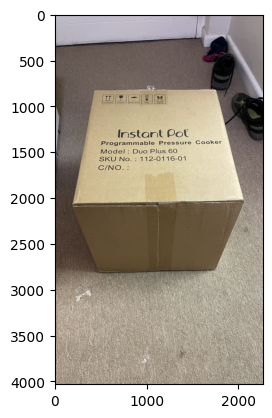

In [74]:
all_reprojected_image_points, _ = cv2.projectPoints(
    object_points_all_array,
    rvec,
    tvec,
    newcameramtx,
    dist_coeffs,
)
# print(f"{all_reprojected_image_points=}")
print(f"{object_points_all_array=}")
plt.imshow(
    draw_points(
        image=image.copy(),
        points=all_reprojected_image_points.reshape(-1, 2),
        radius=50,
        thickness=-1,
        fontScale=5,
        labels=list(object_points_all.keys()),
    )
)

In [34]:
object_points_all_array

array([[ 82.5 ,  91.25, 330.  ],
       [165.  , 182.5 , 330.  ],
       [165.  ,   0.  ,   0.  ],
       [165.  ,   0.  ,   0.  ],
       [  0.  ,   0.  , 330.  ],
       [330.  ,   0.  , 330.  ],
       [  0.  , 365.  , 330.  ],
       [330.  , 365.  , 330.  ],
       [  0.  ,   0.  ,   0.  ],
       [330.  ,   0.  ,   0.  ]], dtype=float32)

In [45]:
3840 / 2160

1.7777777777777777